### IS 607 Artificial Intelligence - Individual Assignment

<b>Name</b>: Khadija B. M. Mahanga </br>
<b>Student_Number</b>: 2024-06-00363

1. Implement a linear regression algorithm using Jupyter Notebook, or Google Colab or VS
Code or Python or MATLAB. Use the California dataset provided in class. (10 marks)
2. Evaluate the performance of your linear regression model in (#1) using appropriate metrics
(e.g., accuracy, precision, recall, F1-score, or mean squared error).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./housing.csv')

### Data Exploration

In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#ocean_proximity is an object as per above. So I am trying to look at what values it contains
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### Detecting Missing Value

In [7]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.


def missing_values_table(df):
        """
        A function that returns a table with missing data
        """
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
             + str(mis_val_table_ren_columns.shape[0]) +
              " column(s) have/has missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
data_missing= missing_values_table(df)
data_missing

Your selected dataframe has 10 columns.
1 column(s) have/has missing values.


,Missing Values,% of Total Values
total_bedrooms,207,1.0


The percentage of missing value is very small. And there is no any other missing values in other column for us to compare their correlation. This could mean that they are *<b>missing completely at random</b>*.

In [9]:
#drop all rows with missing value
df = df.dropna(axis="index")

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df.shape

(20433, 10)

#### Handling Duplicate Value

In [12]:
print(f"There are {len((df[df.duplicated()]).index)} duplicate(s)")

There are 0 duplicate(s)


#### Handling Categorical Value
The `df.info()` showed us that there is one column, `ocean_proximity` with Object dataType; and the `value_counts()` return 5 different values which can mean that this column is a category column with five options

In [13]:
#convert categorical value to integer using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])
df['ocean_proximity'].value_counts()

ocean_proximity
0    9034
1    6496
4    2628
3    2270
2       5
Name: count, dtype: int64

#### Detecting Outliers

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


from the describe information `total_rooms`, `total_bedrooms` seems to have outliers. Because their respective `mean`  is so small compared to `max value`. This could mean that the max value is an outlier.  \n So will proceed with data visualization for some columns for more investigation

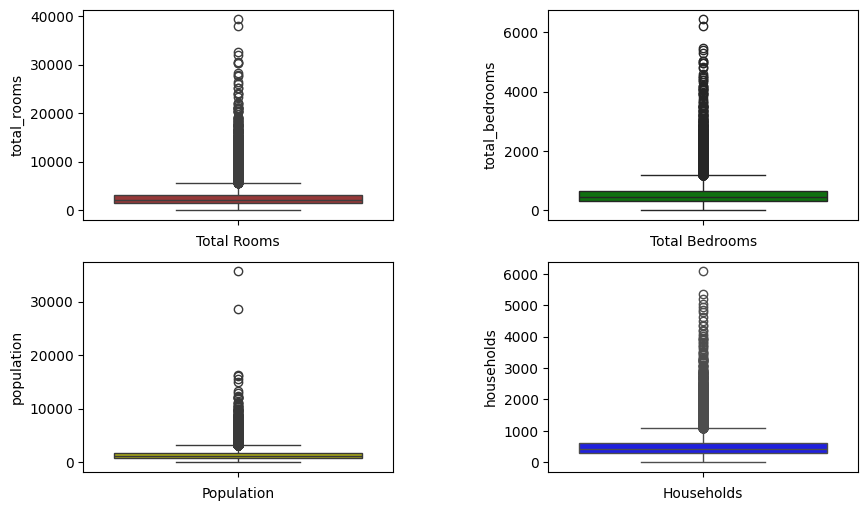

In [15]:
#visualizing data using box_plots
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.5)  #padding
cols = [{ 
    'name': 'total_rooms', 
    'title': 'Total Rooms',
    'color': 'brown'
    },
    { 
    'name': 'total_bedrooms', 
    'title': 'Total Bedrooms',
    'color': 'g'
    },
    { 
    'name': 'population', 
    'title': 'Population',
    'color': 'y'
    },
    { 
    'name': 'households', 
    'title': 'Households',
    'color': 'b'
    },
    ]
for i, c in enumerate(cols):
    x, y = divmod(i, 2)
    sns.boxplot(data=df[c['name']], ax=ax[x,y], color=c['color'])
    ax[x, y].set_xlabel(c["title"])
    #ax[i].set_xticklabels([])
    # print(c)
    # plt.figure(figsize=(8, 6))
    # sns.boxplot(x=)
    # plt.title(f'Boxplot for {c["title"]}')
    # plt.show()

Here we find extreme outliers in the fourth column. We will use statistical method to fnd them


In [16]:
def find_outliers_IQR(df):
   "A function that returns outliers using Interquantile Rage"
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)

   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [17]:
cols = ["total_bedrooms", "total_rooms", "population", "households"]
for col in cols:
    outliers = find_outliers_IQR(df[col])
    print(f'{col} column')
    print(f'Number of outliers: {len(outliers)}')
    print(f'Max outlier value: {outliers.max()}')
    print(f'Min outlier value: {outliers.min()}')
    print(f'\n---------------------------------------\n')

total_bedrooms column
Number of outliers: 1271
Max outlier value: 6445.0
Min outlier value: 1174.0

---------------------------------------

total_rooms column
Number of outliers: 1290
Max outlier value: 39320.0
Min outlier value: 5683.0

---------------------------------------

population column
Number of outliers: 1190
Max outlier value: 35682.0
Min outlier value: 3126.0

---------------------------------------

households column
Number of outliers: 1210
Max outlier value: 6082.0
Min outlier value: 1091.0

---------------------------------------



#### Removing Outliers

In [18]:
#dropping outliers using OutlierTrimmer
from feature_engine.outliers import OutlierTrimmer

ot = OutlierTrimmer(capping_method='iqr', fold=0.5, variables=cols)
ot.fit(df)
df = ot.transform(df)

In [19]:
df.shape

(16126, 10)

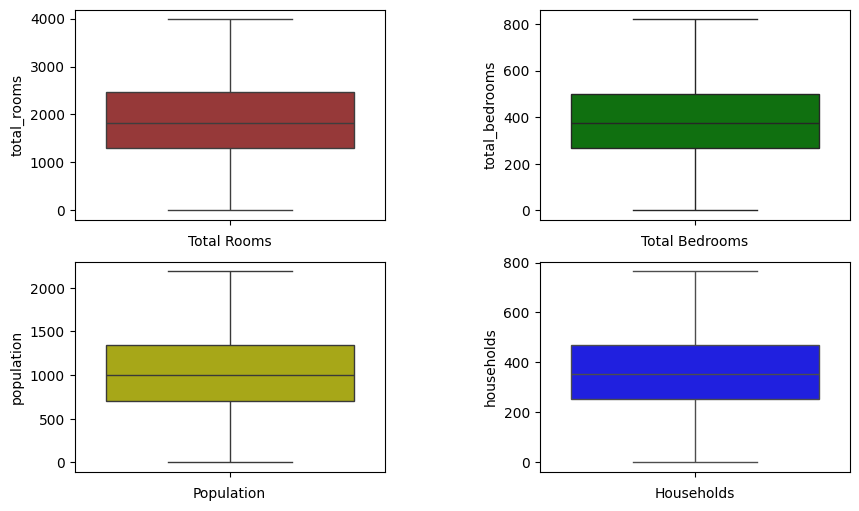

In [20]:
#visualizing data using box_plots
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.5)  #padding
cols_list = [{ 
    'name': 'total_rooms', 
    'title': 'Total Rooms',
    'color': 'brown'
    },
    { 
    'name': 'total_bedrooms', 
    'title': 'Total Bedrooms',
    'color': 'g'
    },
    { 
    'name': 'population', 
    'title': 'Population',
    'color': 'y'
    },
    { 
    'name': 'households', 
    'title': 'Households',
    'color': 'b'
    },
    ]
for i, c in enumerate(cols_list):
    x, y = divmod(i, 2)
    sns.boxplot(data=df[c['name']], ax=ax[x,y], color=c['color'])
    ax[x, y].set_xlabel(c["title"])

The above boxplot looks a little cleaner with no extreme outliers

In [21]:
df[cols].max()

total_bedrooms     821.0
total_rooms       3988.0
population        2189.0
households         765.0
dtype: float64

In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000,16126.000000
mean,-119.637800,35.709962,30.566228,1897.607714,385.717537,1031.831576,362.022758,3.822663,202943.863450,1.189632
std,2.005171,2.164456,12.281986,847.771782,167.600905,458.034567,156.524866,1.898698,115914.490389,1.424614
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.830000,33.940000,20.250000,1294.000000,268.250000,707.000000,253.000000,2.519275,113600.000000,0.000000
50%,-118.700000,34.390000,32.000000,1832.000000,374.000000,1003.000000,354.000000,3.510000,175350.000000,1.000000
75%,-118.050000,37.740000,39.000000,2477.000000,499.000000,1344.000000,469.000000,4.691350,260250.000000,1.000000
max,-114.490000,41.950000,52.000000,3988.000000,821.000000,2189.000000,765.000000,15.000100,500001.000000,4.000000


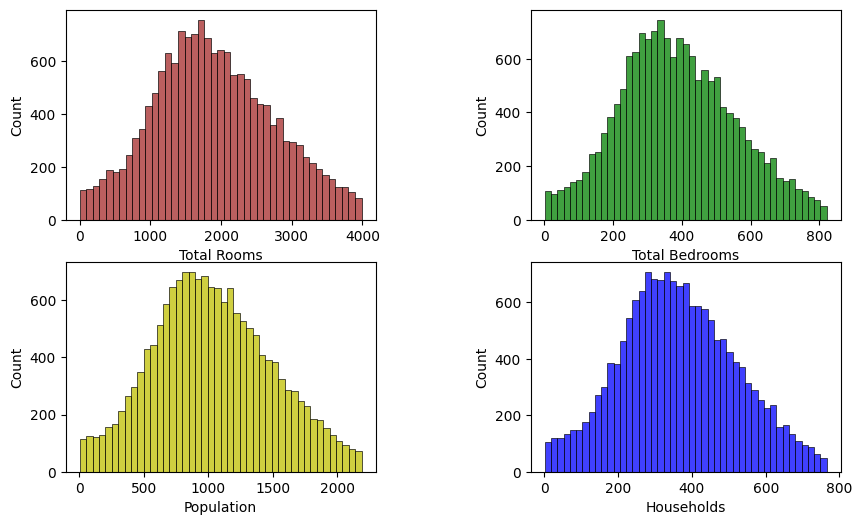

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.5)  #padding

for i, c in enumerate(cols_list):
    x, y = divmod(i, 2)
    sns.histplot(data=df[c['name']], ax=ax[x,y], color=c['color'])
    ax[x, y].set_xlabel(c["title"])

In [22]:
#scaling the target variable because its large compared to other variable.
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df['median_house_value'] = scaler.fit_transform(df[['median_house_value']])
# df.describe()

#### Explore Relationship between variables

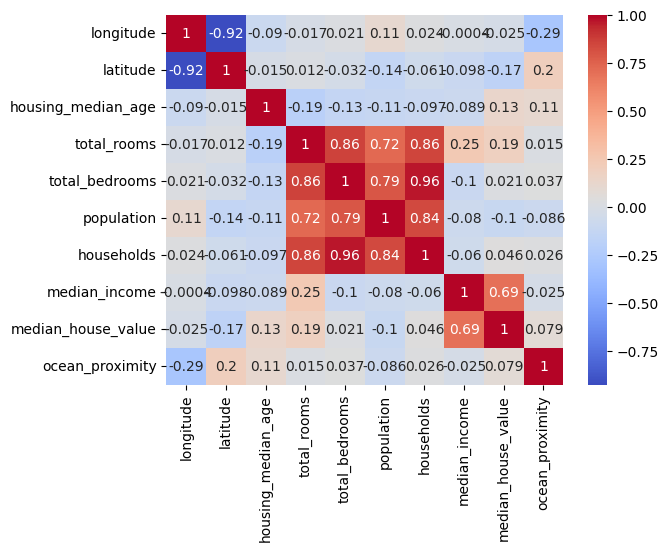

In [23]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

We see that the house value is mostly dependent/correlated with ocean_proximity with a 0.79 and median_income at 0.69.

#### Splitting Dataset into Training and Testing


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis=1)
#X = df[['ocean_proximity', 'median_income', 'total_rooms', 'housing_median_age']]

Y = df['median_house_value']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=42)

#### Building Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#train the model
model.fit(X_train, Y_train)

LinearRegression()

#### Make Predictions

In [26]:
y_predict = model.predict(X_valid)

### Evaluate Model Performance

We will use the mean squared metrics

In [27]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_valid, y_predict)
print(f'Mean Squared Error: {mse}')

# Using R-squared score
print(f'R-squared score: {model.score(X_valid, Y_valid)}')

Mean Squared Error: 4516467800.249318
R-squared score: 0.6627339148046933


Here, the MSE is very large because the target value `median_house_value` is very large compared to the rest of the data. So if we consider the `root squared of the mse` which is 67,204.67 in the unit of the target label.. It is also too high. This means that the model could not fit the complex relationship to predict the house value linearly (underfitting). So we need consider other non-linear models such as polynomial regression or more advanced tools.